<a href="https://colab.research.google.com/github/takacsanna/igy_neveld_fakt/blob/main/hazi6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6. házi feladat

In [23]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
from datetime import datetime 

In [ ]:
start = datetime(2012, 1, 1)
end = datetime(2022, 1, 1)
df = pdr.DataReader('GOOG', 'yahoo', start, end)
df.head()

#nagyon nem szeretne működni, elvileg megoldották ezt a hibaüzenetet a 0.10.0 pandasban, de itt nem úgy tűnik:(

In [27]:
from google.colab import files

In [28]:
uploaded=files.upload()

Saving sbux.xlsx to sbux.xlsx


In [54]:
sbux=pd.read_excel("sbux.xlsx")
sbux.head()

,Date,Adj Close
0,1992-06-26,0.274825
1,1992-06-29,0.293998
2,1992-06-30,0.284411
3,1992-07-01,0.290803
4,1992-07-02,0.290803


In [55]:
sbux=sbux.drop(columns=['Date'])

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
sc = MinMaxScaler(feature_range=(0,1))
sbux = sc.fit_transform(sbux)

In [57]:
sbux = pd.DataFrame(sbux).to_numpy()

Felbontás szeletekre

In [36]:
import numpy as np

In [31]:
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps # Az adott szekvencia-darab utolsó eleme
		if end_ix > len(sequence)-1: # Ellenőrizzük nem értünk-e a teljes lista végére
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # Kimentjük a szekvencia darabot és az utolsó elemet mint eredményváltozó
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y)

In [58]:
x, y = split_sequence(sbux, 10)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

LSTM modell létrehozása

In [65]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
early_stopping_callback = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/200
150/150 [==============================] - 13s 39ms/step - loss: 0.0066 - val_loss: 2.8448e-04
Epoch 2/200
150/150 [==============================] - 5s 30ms/step - loss: 0.0013 - val_loss: 1.4863e-04
Epoch 3/200
150/150 [==============================] - 4s 27ms/step - loss: 9.0917e-04 - val_loss: 1.5781e-04
Epoch 4/200
150/150 [==============================] - 4s 26ms/step - loss: 9.3384e-04 - val_loss: 2.1297e-04
Epoch 5/200
150/150 [==============================] - 4s 26ms/step - loss: 9.9386e-04 - val_loss: 1.5603e-04
Epoch 6/200
150/150 [==============================] - 4s 27ms/step - loss: 7.5539e-04 - val_loss: 2.0749e-04
Epoch 7/200
150/150 [==============================] - 4s 26ms/step - loss: 8.5007e-04 - val_loss: 2.6174e-04
Epoch 8/200
150/150 [==============================] - 4s 27ms/step - loss: 7.4934e-04 - val_loss: 4.3953e-04
Epoch 9/200
150/150 [==============================] - 4s 27ms/step - loss: 8.5809e-04 - val_loss: 2.9093e-04
Epoch 10/200
150/

In [70]:
pred_x=model.predict(x_test)

In [82]:
x_test.shape

(1497, 10)

In [76]:
pred_x.shape

(1497, 1)

In [69]:
import matplotlib.pyplot as plt

In [89]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

In [91]:
pred_x = np.reshape(pred_x, (pred_x.shape[0], pred_x.shape[1], 1))

ValueError: ignored

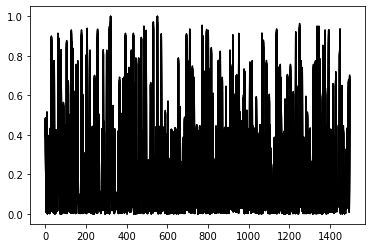

In [90]:
plt.plot(x_test, color = 'black', label = 'Starbucks Stock Price')
plt.plot(pred_x, color = 'green', label = 'Predicted Starbucks Stock Price')
plt.title('Starbucks Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Starbucks Stock Price')
plt.legend()
plt.show()

#valami nem oké a shape-ekkel, de nem tudtam kibogarászni:(